### Abstract

The source code for this project is located [here](https://github.com/ellisterling/enso-predictor).

In this blog post, I will attempt 

### Introduction

The El Niño Southern Oscillation (ENSO) is a climate circulation pattern resulting from temperature dynamics in the Equatorial Pacific Ocean. Colder temperatures along the South American coast indicate a La Nina year

![Screenshot 2025-05-19 at 2.40.23 PM.png](<attachment:Screenshot 2025-05-19 at 2.40.23 PM.png>)

In doing this project, I wanted to see if simple Logistic Regression could classify future El Nino stages 6 months in advance based on current sea surface temperature variables. Others have implemented machine learning algorithms to solve this problem with climate model output integration and/or increased features in terms of factors indicating ENSO (SST, sea surface height, precipitation, etc.). Specifically, it is difficult to create a model that doesn't include any climate modeling because satellite monitoring of Earth only started in the late 1900s (@Chen_Gilani_Harlim_2021), so there is an extremely limited range of data available to train models on. Most models, even if they don't use predictive models to directly predict ENSO conditions, will use reconstructed climate from a Global Climate Model in order to expand their dataset. @Chen_Gilani_Harlim_2021 implemented a Bayesian model that avoided the use of modeling that was able to achieve better accuracy than some models that are integrated with climate models. Notably, this model included many more features than we will use in this implementation. @Hernández_Mesa_Lall_2020 were also able to successfully predict ENSO using a non-homogenous Hidden Markov Model. After learning about HMMs in AI, this implementation makes a lot of sense based on how climate proxies are also, in a way, indicators of hidden states. In this blog post, I will describe how I attempted to implement a Logistic Regression model able to predict ENSO stages with reduced features from other implementations.

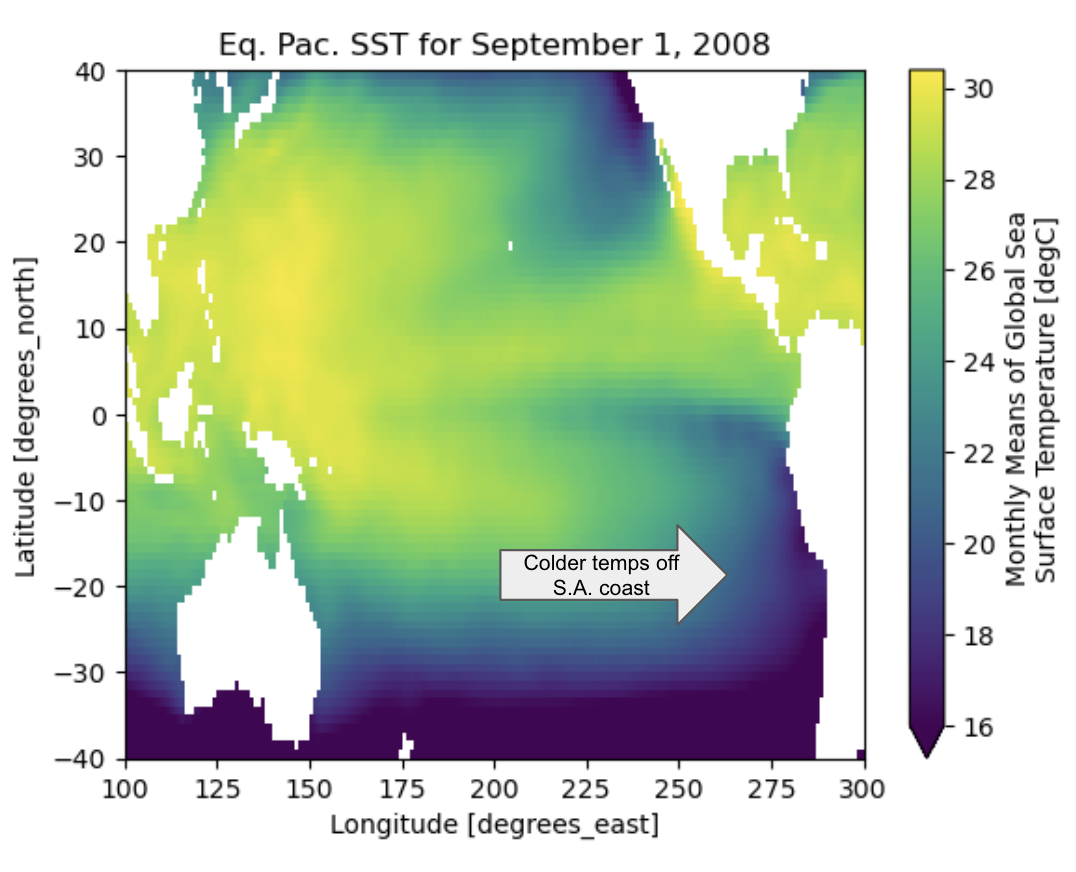

### Values Statement

The potential users of this project, had it been more successful, would have been policymakers and communities who are generally more affected by El Nino/La Nina conditions. Additionally, scientists could use this model and improve it using climate modeling. Other than these users, people who could be affected by this project include people who live in areas that are heavily impacted by these events--a wrong prediction could be hazardous if communities prepare in one way and are unprepared for another. I think these are the same people who would benefit from this technology. Additionally, it would in theory be less computationally expensive than implementing a climate model and using those results to inform predictions, so it would have been helpful to scientists and others implementing climate prediction models had it worked. People who could be harmed include the previously mentioned groups since a wrong prediction would be very harmful. 

I wanted to work on this problem because, after reading about ENSO and learning about it in classes, I was interested to see if sea surface temperature (SST) alone (initially, along with precipitation) could predict future stages. I had learned a lot about climate modeling in some of my Earth and Climate Science classes, and wanted to see if I could implement algorithms from this class to predict ENSO events. I also just wanted to combine my ECSC knowledge with a project for CS!

I do not think the world will be a necessarily more or less equitable, just, joyful, or sustainable place because of what I implented, mainly because it was not very successful in terms of what I was able to produce. I think that the main effect this technology will have will be on me, simply because now I know firsthand how it is very difficult to predict weather patterns, even well-defined ones.

### Materials and Methods

#### Data

For the SST data, I used the Japan Meteorological Associaation's COBE-SST 2 dataset (@NOAAsst). COBE-SST 2 and Sea Ice data was provided by the NOAA PSL, Boulder, Colorado, USA, from their website at https://psl.noaa.gov. This dataset goes back to 1850, but I had to just use the data since 1950 in order to match up with the data I used for the target vector. Much of this data has been filled in/reconstructed in order to account for the lack of data before the late 1900s. The target data was derived from the Oceanic Nino Index (ONI) dataset, sourced from the @ONI. The ONI goes back to 1950, and represents an ocean-wide anomaly (or change from the normal). An ONI of < -0.5  indicates a La Nina phase, whereas an ONI of > 0.5 indicates an El Nino phase. Each row in my dataset represents the yearly SST average. The columns of my feature matrix are all regions of the ocean. There is no precipitation data included in this dataset, which I will explain in the following section.

#### Approach

I went through this data and turned it into first ternary data and then binary. This was because I did not have time to implement a multinomial optimizer. In the end, I classified years where the ONI was < 0 as La Nina, and years where the ONI was > 0 as El Nino. This simplification certainly could have caused issues, but when I ran an sklearn model on each of them, I found that the target vector with three classes actually resulted in less accuracy (probably because I didn't have enough data points). I used all the regions/features as predictors, which also could have affected accuracy (again, because of the small amount of data points I had.)

In the time given to work on the project I couldn't figure out how to deal with both spatial and temporal data without making the spatial aspect the features. With this structure of the feature matrix, I couldn't figure out how to add precipitation without changing the whole structure of the data. This means that I could only use SST as a broad-scale feature.

When I realized how much trouble the data was giving me, I pivoted to just trying to classify current ENSO states, which proved harder than I expected. To do this I used Logistic Regression with Gradient Descent Optimizer and Adam Optimizer. I wasn't able to get them to reach good accuracy on the training data, so I then pivoted to testing other sklearn models. I created a 60/40 train-test split before running the sklearn implementations of Logistic Regression with LBFGS, liblinear, and Stochastic Gradient descent optimizers. I then ran the sklearn implementations of Naive Bayes and Random Forest classifiers. I evaluated their performance by their accuracy and whether or not they just predicted all 1s or all 0s.

### Results

When I ran the models that I implemented myself, I couldn't get them to predict anything other than all 1s or all 0s. Depending on the train-test split, sometimes Adam would predict mostly 1s and a few 0s or mostly 0s and a few 1s, but it didn't affect the accuracy. The accuracy on the training data for both hovered around 50%, which makes sense when you consider how they were only predicting one class for the whole dataset. The loss plots for both of them looked odd, and although Gradient Descent appeared to converge, it converged to a low accuracy.

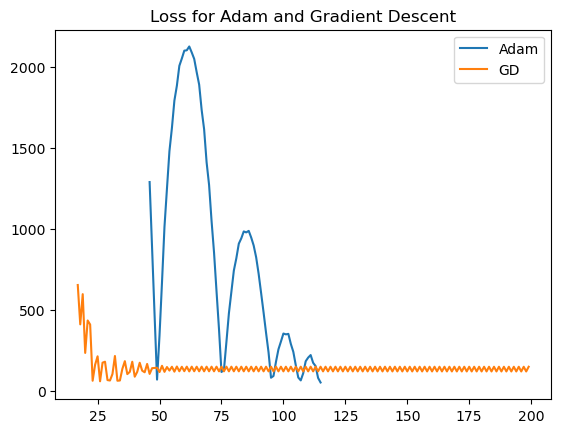

**Figure #:** Loss over iterations for Adam and Gradient Descent optimizers for Logistic Regression.

After wrestling with the handmade models, trying to get them to work and failing, I decided to check the sklearn implementations of a few different models to see how they fared. Below are the results of the end accuracy for five different models for one of the runs. Most of the models hover around 50% accuracy, just as our handmade models did. Logistic Regression actually performed the best and most consistently, generally producing accuracies of about 70%-80% with the liblinear and LBFGS optimizers. Occasionally, Naive Bayes would also perform well, but it was more unreliable than the LR implementations.

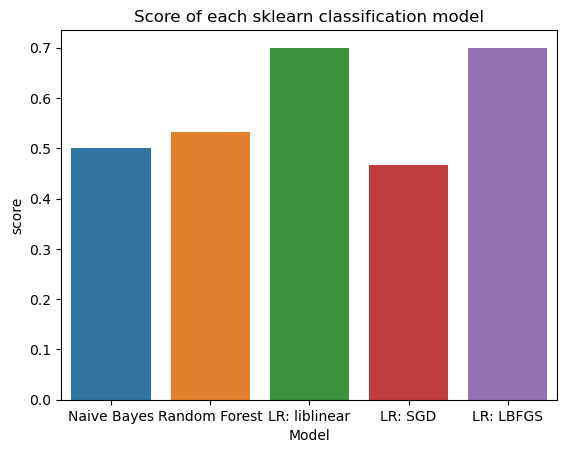

**Figure #:** Accuracy of five models from the scikit-learn library.

### Discussion

The results of this project clearly do not show much success--I wasn't able to achieve any more than 55% accuracy with the algorithms I implemented, and even most of scikit-learn's algorithms didn't have great accuracy. liblinear and LBFGS were two Logistic Regression optimizers that performed very well (70%-80% accuracy), so if I had more time on this project, I would have attempted to implement them. However, the greater question is whether or not this approach was the right one at all. Many previous studies attempting to implement machine learning to predict ENSO have done so by combining with predictive climate model output. When I started this project, I was curious if it would be possible to implement a predictor without doing so. Although people have implemented machine learning algorithms that predict ENSO without using future climate model predictions, these algorithms all used many more features than I included. Additionally, I went into this with very little experience doing machine learning with data that was both spatial and temporal, and so my solution to this problem (to assign regions within the Equatorial Pacific and use those regions as features) was maybe not the best approach either. Given that researchers such as @Chen_Gilani_Harlim_2021, @Hernández_Mesa_Lall_2020, and @Pal_Maity_Ratnam_Nonaka_Behera_2020 have been able to achieve very good accuracy with their models, and experts in the field can predict stages without the help of machine learning, I am certain that the general idea of this project has a future in the machine learning and climate science communities. However, the way I went about implementing my algorithm was not the optimal one. Future implementations should either integrate with climate models or include more features to account for the interconnectedness of the climate system.

### Group Contribution

Because I was working on this project alone, I worked on all parts of the source code and completed all the work related to this project.

### Personal Reflection

One thing I learned from the process of creating this project is that things that seem simple can often be quite complicated. I really struggled with the data wrangling--since I had experience using other peoples' climate models, I assumed that working with spatial data would be fine. However, the combination of spatial and temporal data ended up throwing me for a loop. I think the solution I came up with was reasonable, but it was definitely a "make-do" kind of situation. Additionally, I learned a lot from reading papers about ENSO and how connected it is to the entire Earth system. I had an idea of this from previous classes, but it was cool to be able to read scientific papers on it and see how predictions are made.

Unfortunately, I did not meet my goal for this project. I thought that a good backup would be to try and classify current ENSO stages instead of predicting them, but I also did not obtain good accuracy for this. However, I do think that I learned a lot about why what I was going to attempt wouldn't work, and why climate modeling is likely needed in order to confidently predict future atmospheric circulation. Additionally, when I undertook this project, I was aiming for accuracy of 50% or more--which I did obtain. Unfortunately, that accuracy is not enough to be useful in its function as a predictor.

I had to do a lot of pivoting in this project, and I think that in the future, I will take the flexibility that I gained here and put it to use. It was good practice in scaling down my expectations in the moment and working with what I had. This will be useful in all aspects of my future life, including personal, professional, and any academic work I may continue doing in the future.